In [21]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [22]:
zkc = nx.karate_club_graph()
order = sorted(list(zkc.nodes))

In [23]:
A = nx.to_numpy_matrix(zkc, nodelist=order)
I = np.eye(zkc.number_of_nodes())

In [24]:
# construct adjacency matrix where every node has a self-loop
A_hat = A + I
# generate the degree matrix
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))

In [25]:
W_1 = np.random.normal(loc=0, scale=1, size=(zkc.number_of_nodes(), 4))
W_2 = np.random.normal(loc=0, scale=1, size=(W_1.shape[1], 2))

In [26]:
def relu(X):
    return np.maximum(X, 0)

def gcn_layer(A_hat, D_hat, X, W):
    return relu(D_hat**-1 * A_hat * X * W)

H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)

output = H_2

In [27]:
feature_representations = {
    node : np.array(output)[node] for node in zkc.nodes()
}

In [28]:
feature_representations

{0: array([0.69057925, 0.5225854 ]),
 1: array([0.73832523, 0.62997414]),
 2: array([0.35085411, 0.29089921]),
 3: array([0.53587279, 0.29447304]),
 4: array([0.39008989, 0.33654179]),
 5: array([0.61862983, 0.55423093]),
 6: array([0.6403504 , 0.56168569]),
 7: array([0.53746914, 0.4525942 ]),
 8: array([0.14053169, 0.11112254]),
 9: array([0.12985835, 0.11476145]),
 10: array([0.72331613, 0.62967021]),
 11: array([0.20411843, 0.1404622 ]),
 12: array([0.65109877, 0.1881842 ]),
 13: array([0.32377658, 0.27261115]),
 14: array([0.09114804, 0.08011662]),
 15: array([0.07484939, 0.06722023]),
 16: array([0.76511378, 0.68559619]),
 17: array([1.02694034, 0.88204479]),
 18: array([0.27332157, 0.24999654]),
 19: array([0.43255047, 0.36661999]),
 20: array([0.07484939, 0.06722023]),
 21: array([0.90361146, 0.79534279]),
 22: array([0.19607893, 0.17886251]),
 23: array([0.28200756, 0.23333957]),
 24: array([0.42505506, 0.3474084 ]),
 25: array([0.41628753, 0.34047105]),
 26: array([0.06497801

In [29]:
different_clubs = set(zkc.node[n]['club'] for n in zkc.node)
print(different_clubs)

{'Officer', 'Mr. Hi'}


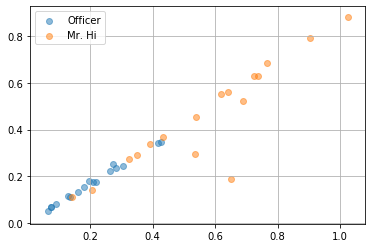

In [31]:
colour_map = {'Officer' : 'tab:blue', 'Mr. Hi' : 'tab:orange'}
fig, ax = plt.subplots()
for club in colour_map:
    members = [n for n in zkc.node if zkc.node[n]['club'] == club]
    reps = [feature_representations[k] for k in members]
    x, y = [r[0] for r in reps], [r[1] for r in reps]
    ax.scatter(x, y, color=colour_map[club], alpha=0.5, label=club)

ax.legend()
ax.grid(True)

plt.show()